In [4]:
%matplotlib inline
PROJECT_PATH='/mnt/lab_data/kundaje/users/pgreens/projects/RC_convolutions/'

from momma_dragonn.data_loaders.hdf5_data_loader import MultimodalAtOnceDataLoader
data_loader = MultimodalAtOnceDataLoader(path_to_hdf5="%sdeep_learning/hdf5_files/valid_data.hdf5"%PROJECT_PATH,
                                         bundle_x_and_y_in_generator=False,
                                         strip_enclosing_dictionary=True)
data = data_loader.get_data()

('Input modes', [u'sequence'])
('Output modes', [u'output'])
('num_to_load_for_eval is ', None, 'but num_items is', 9000, '- fixing')


/users/pgreens/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


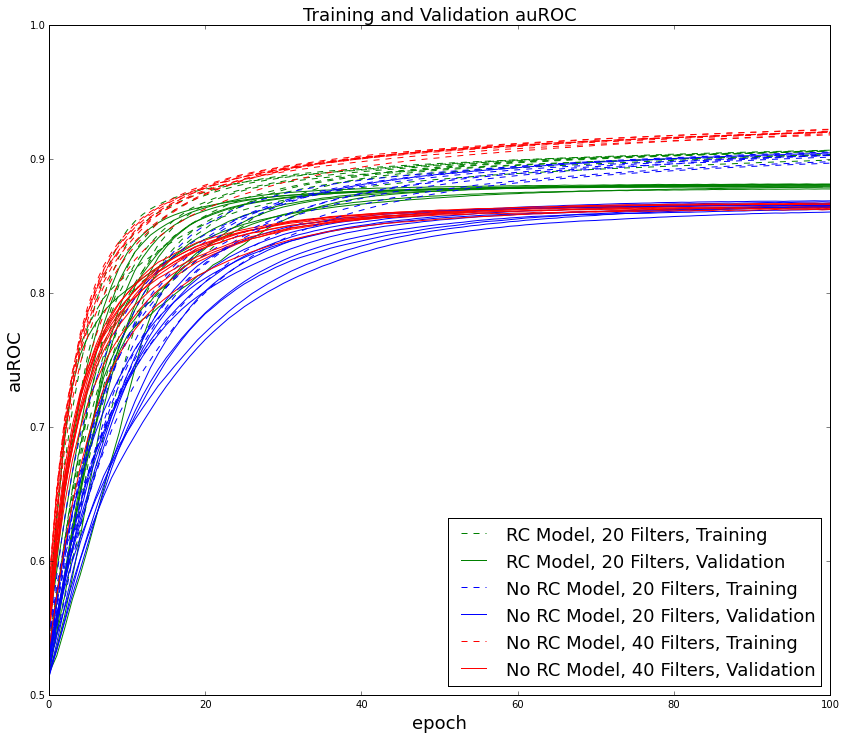

In [6]:
import yaml
import matplotlib
matplotlib.use('Agg') 
import matplotlib.pyplot as plt


result_db = '/mnt/lab_data/kundaje/users/pgreens/projects/RC_convolutions/deep_learning/result_databases/tal_gata_RC_simulations_no_L1_perf-metric-auROC.db'

TRANSFORM_KEY = {
    'RevComp_20pct_noise_20_filters': 'RC Model, 20 Filters',
    'no_RevComp_20pct_noise_20_filters': 'No RC Model, 20 Filters',
    'no_RevComp_20pct_noise_40_filters': 'No RC Model, 40 Filters'
}

db = yaml.load(open(result_db, 'r'))['records']
plt.figure(figsize=(14,12))
plt.plot()
max_x = 0
for (i,result) in enumerate(db):
    if '20pct' not in result['message']:
        continue
    train = [el[0] for el in result['key_metric_history'] if el[0] != 'train']
    valid = [el[1] for el in result['key_metric_history'] if el[1] != 'valid']
    if 'no_RevComp_20pct_noise_20_filters' in result['message']:
        color = 'blue'
    elif 'RevComp_20pct_noise_20_filters' in result['message']:
        color = 'green'
    elif 'no_RevComp_20pct_noise_40_filters' in result['message']: 
        color = 'red' 
    if 'seed_3' in result['message']:
        plt.plot(range(len(train)), train, label='%s, Training'%TRANSFORM_KEY[result['message'].split('_seed')[0]], color=color, ls='--')
        plt.plot(range(len(valid)), valid, label='%s, Validation'%TRANSFORM_KEY[result['message'].split('_seed')[0]], color=color, ls='solid')
    else:
        plt.plot(range(len(train)), train, color=color, ls='--')
        plt.plot(range(len(valid)), valid, color=color, ls='solid')

    max_x = max_x if len(train) < max_x else len(train)
plt.title('Training and Validation auROC', fontsize=18)
plt.legend(loc='lower right', fontsize=18, )
plt.xlabel('epoch', fontsize=18)
plt.ylabel('auROC', fontsize=18)
# plt.xlim([0, max_x - 50])
plt.xlim([0, 100])
plt.ylim([0.5, 1])
plt.show()
# plt.savefig('/mnt/lab_data/kundaje/users/pgreens/projects/RC_convolutions/plots/3motif_1_23_17_RC_v_no_RC_no_L1_%sseq_with_20pct_noise.png'%(10000))
# plt.savefig('/mnt/lab_data/kundaje/users/pgreens/projects/RC_convolutions/plots/3motif_1_23_17_RC_v_no_RC_no_L1_%sseq_with_20pct_noise.pdf'%(10000), format='pdf')


In [7]:

model_load_configs = [
    {"weights": "%s/deep_learning/model_files/tal_gata_RC_simulations/record_21_model_7dj7L_modelWeights.h5"%PROJECT_PATH,
     "json": "%s/deep_learning/model_files/tal_gata_RC_simulations/record_21_model_7dj7L_modelJson.json"%PROJECT_PATH,
     "descriptor": "RevComp_20pct_noise_20_filters_seed_1"
    },
    {"weights": "%s/deep_learning/model_files/tal_gata_RC_simulations/record_11_model_BnORR_modelWeights.h5"%PROJECT_PATH,
     "json": "%s/deep_learning/model_files/tal_gata_RC_simulations/record_11_model_BnORR_modelJson.json"%PROJECT_PATH,
     "descriptor": "no_RevComp_20pct_noise_20_filters_seed_1"
    },
    {"weights": "%s/deep_learning/model_files/tal_gata_RC_simulations/record_1_model_sneEG_modelWeights.h5"%PROJECT_PATH,
     "json": "%s/deep_learning/model_files/tal_gata_RC_simulations/record_1_model_sneEG_modelJson.json"%PROJECT_PATH,
     "descriptor": "no_RevComp_20pct_noise_40_filters_seed_1"
    }
]

print model_load_configs

[{'descriptor': 'RevComp_20pct_noise_20_filters_seed_1', 'json': '/mnt/lab_data/kundaje/users/pgreens/projects/RC_convolutions//deep_learning/model_files/tal_gata_RC_simulations/record_21_model_7dj7L_modelJson.json', 'weights': '/mnt/lab_data/kundaje/users/pgreens/projects/RC_convolutions//deep_learning/model_files/tal_gata_RC_simulations/record_21_model_7dj7L_modelWeights.h5'}, {'descriptor': 'no_RevComp_20pct_noise_20_filters_seed_1', 'json': '/mnt/lab_data/kundaje/users/pgreens/projects/RC_convolutions//deep_learning/model_files/tal_gata_RC_simulations/record_11_model_BnORR_modelJson.json', 'weights': '/mnt/lab_data/kundaje/users/pgreens/projects/RC_convolutions//deep_learning/model_files/tal_gata_RC_simulations/record_11_model_BnORR_modelWeights.h5'}, {'descriptor': 'no_RevComp_20pct_noise_40_filters_seed_1', 'json': '/mnt/lab_data/kundaje/users/pgreens/projects/RC_convolutions//deep_learning/model_files/tal_gata_RC_simulations/record_1_model_sneEG_modelJson.json', 'weights': '/mnt

In [8]:
from deeplift.conversion import keras_conversion as kc
reload(kc)
from keras.models import model_from_json
# model = model_from_json(open(json).read())
# model.load_weights(weights)

for model_load_config in model_load_configs:
    print model_load_config
    weights = model_load_config['weights']
    json = model_load_config['json']
    descriptor = model_load_config['descriptor']
    keras_model = kc.load_keras_model(weights=weights,
                                      json=json)
    model_load_config['model'] = keras_model

Using gpu device 6: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 5005)
Using Theano backend.


{'descriptor': 'RevComp_20pct_noise_20_filters_seed_1', 'json': '/mnt/lab_data/kundaje/users/pgreens/projects/RC_convolutions//deep_learning/model_files/tal_gata_RC_simulations/record_21_model_7dj7L_modelJson.json', 'weights': '/mnt/lab_data/kundaje/users/pgreens/projects/RC_convolutions//deep_learning/model_files/tal_gata_RC_simulations/record_21_model_7dj7L_modelWeights.h5'}
{'descriptor': 'no_RevComp_20pct_noise_20_filters_seed_1', 'json': '/mnt/lab_data/kundaje/users/pgreens/projects/RC_convolutions//deep_learning/model_files/tal_gata_RC_simulations/record_11_model_BnORR_modelJson.json', 'weights': '/mnt/lab_data/kundaje/users/pgreens/projects/RC_convolutions//deep_learning/model_files/tal_gata_RC_simulations/record_11_model_BnORR_modelWeights.h5'}
{'descriptor': 'no_RevComp_20pct_noise_40_filters_seed_1', 'json': '/mnt/lab_data/kundaje/users/pgreens/projects/RC_convolutions//deep_learning/model_files/tal_gata_RC_simulations/record_1_model_sneEG_modelJson.json', 'weights': '/mnt/la

/users/pgreens/git/keras/keras/backend/theano_backend.py:188: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return variable(np.random.uniform(low=low, high=high, size=shape),


In [9]:
for model_load_config in model_load_configs:
    print("\n".join(str(x) for x in model_load_config['model'].get_config()))
    print("\n\n\n")

{'class_name': 'RevCompConv1D', 'config': {'batch_input_shape': (None, 200, 4), 'W_constraint': None, 'b_constraint': None, 'name': u'revcompconv1d_1', 'activity_regularizer': None, 'trainable': True, 'filter_length': 21, 'init': 'glorot_uniform', 'bias': True, 'nb_filter': 20, 'input_dtype': u'float32', 'subsample_length': 1, 'border_mode': u'valid', 'input_dim': None, 'b_regularizer': None, 'W_regularizer': None, 'activation': 'linear', 'input_length': None}}
{'class_name': 'RevCompConv1DBatchNorm', 'config': {'gamma_regularizer': None, 'name': u'revcompconv1dbatchnorm_1', 'epsilon': 0.001, 'trainable': True, 'mode': 0, 'beta_regularizer': None, 'momentum': 0.99, 'axis': -1}}
{'class_name': 'Activation', 'config': {'activation': 'relu', 'trainable': True, 'name': u'activation_1'}}
{'class_name': 'MaxPooling1D', 'config': {'stride': 20, 'pool_length': 20, 'trainable': True, 'name': u'maxpooling1d_1', 'border_mode': u'valid'}}
{'class_name': 'WeightedSum1D', 'config': {'input_is_revcom

In [10]:
import numpy as np
import matplotlib.pyplot as plt
nregions = 10000

X = np.array(data.X[:nregions])
Y = np.array(data.Y[:nregions])

RevComp_20pct_noise_20_filters_seed_1
2.2822
2.2822


/users/pgreens/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


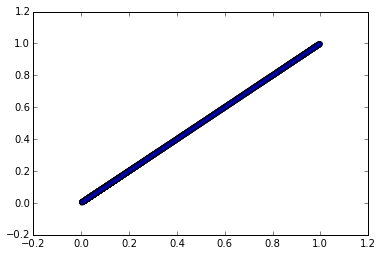

no_RevComp_20pct_noise_20_filters_seed_1
2.2422
2.2546


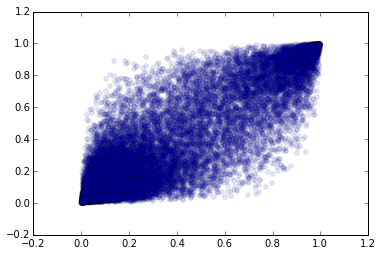

no_RevComp_20pct_noise_40_filters_seed_1
2.2334
2.2313


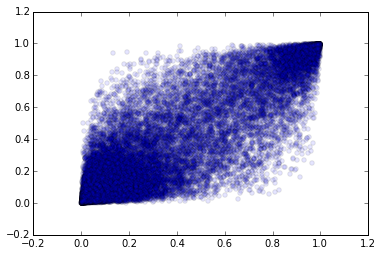

In [11]:
for model_load_config in model_load_configs:
    print(model_load_config['descriptor'])
    keras_model = model_load_config['model']
    fwd_predictions = keras_model.predict(X)
    rev_predictions = keras_model.predict(X[:,::-1,::-1])
    
    fwd_prediction_acc = np.sum((fwd_predictions > 0.5)*1 == Y)/float(nregions)
    rev_prediction_acc = np.sum((rev_predictions > 0.5)*1 == Y)/float(nregions)
    
    print(fwd_prediction_acc)
    print(rev_prediction_acc)
    
    plt.figure()
    plt.scatter(fwd_predictions, rev_predictions, alpha=0.1)
    plt.show()

In [12]:
#load the database records to show difference in perf
records_infos = [
    {'database_path': "%s/deep_learning/result_databases/tal_gata_RC_simulations_no_L1_perf-metric-auROC.db"%PROJECT_PATH,
     'descriptor': "RevComp_20pct_noise_20_filters",
     'name': "RC Model, 20 filters"},
    {'database_path': "%s/deep_learning/result_databases/tal_gata_RC_simulations_no_L1_perf-metric-auROC.db"%PROJECT_PATH,
     'descriptor': "no_RevComp_20pct_noise_20_filters",
     'name': "No RC Model, 20 filters"},
    {'database_path': "%s/deep_learning/result_databases/tal_gata_RC_simulations_no_L1_perf-metric-auROC.db"%PROJECT_PATH,
     'descriptor': "no_RevComp_20pct_noise_40_filters",
     'name': "No RC Model, 40 filters"}, 
]


In [13]:
import json
from collections import OrderedDict

all_messages = []
for records_info in records_infos:
    db_records = json.loads(open(records_info['database_path']).read())['records']
    for record in db_records:
        all_messages.append(record['message'])
# print all_messages

grouped_records = OrderedDict()
for records_info in records_infos:
    db_records = json.loads(open(records_info['database_path']).read())['records']
    filtered_records = []
    unique_messages = set()
    for record in db_records:
        message = record['message']
        print message
        print records_info['descriptor']
#         other_messages = [el for el in all_messages if el != message]
        if message.startswith(records_info['descriptor']):# in message and records_info['descriptor'] not in other_messages:
            if message not in unique_messages: #avoid double-counting runs
                filtered_records.append(record)
                unique_messages.add(message)
    grouped_records[records_info['name']] = filtered_records

RevComp_20pct_noise_20_filters_seed_5
RevComp_20pct_noise_20_filters
RevComp_20pct_noise_20_filters_seed_9
RevComp_20pct_noise_20_filters
RevComp_20pct_noise_20_filters_seed_4
RevComp_20pct_noise_20_filters
RevComp_20pct_noise_20_filters_seed_1
RevComp_20pct_noise_20_filters
RevComp_20pct_noise_20_filters_seed_10
RevComp_20pct_noise_20_filters
RevComp_20pct_noise_20_filters_seed_8
RevComp_20pct_noise_20_filters
RevComp_20pct_noise_20_filters_seed_2
RevComp_20pct_noise_20_filters
RevComp_20pct_noise_20_filters_seed_6
RevComp_20pct_noise_20_filters
RevComp_20pct_noise_20_filters_seed_3
RevComp_20pct_noise_20_filters
RevComp_20pct_noise_20_filters_seed_7
RevComp_20pct_noise_20_filters
no_RevComp_20pct_noise_20_filters_seed_6
RevComp_20pct_noise_20_filters
no_RevComp_20pct_noise_20_filters_seed_1
RevComp_20pct_noise_20_filters
no_RevComp_20pct_noise_40_filters_seed_1
RevComp_20pct_noise_20_filters
no_RevComp_20pct_noise_20_filters_seed_4
RevComp_20pct_noise_20_filters
no_RevComp_20pct_nois

In [14]:
key_order = ['RC Model, 20 filters', 'No RC Model, 40 filters', 'No RC Model, 20 filters']
auroc_per_group = OrderedDict([(key, [x['best_valid_perf_info']['valid_all_stats']['mean_auROC'] for x in grouped_records[key]]) for key in key_order])
auprc_per_group = OrderedDict([(key, [x['best_valid_perf_info']['valid_all_stats']['mean_auPRC'] for x in grouped_records[key]]) for key in key_order])

In [15]:
print grouped_records.keys()

['RC Model, 20 filters', 'No RC Model, 20 filters', 'No RC Model, 40 filters']


In [16]:
#R has the exact wilcoxon test implemented. So, paste these arrays into R to test p-value. Use one-sided test
for group, groupname in [(auroc_per_group,'auroc'), (auprc_per_group,'auprc')]:
    for key in auroc_per_group:
        keyclean = key.replace(" ","_").replace(",","")+"_"+groupname
        print keyclean, "<-","c("+",".join(str(x) for x in group[key])+")"
    for key1, key2 in zip(auroc_per_group.keys()[:-1], group.keys()[1:]):
        key1 = key1.replace(" ","_").replace(",","")+"_"+groupname
        key2 = key2.replace(" ","_").replace(",","")+"_"+groupname
        print("wilcox.test("+key1+", "+key2+", alternative=\"less\")")

RC_Model_20_filters_auroc <- c(0.881705429944,0.881696013983,0.881301711488,0.881157708989,0.881066412474,0.880926055534,0.880371582156,0.879528850262,0.879300707893,0.878006384893)
No_RC_Model_40_filters_auroc <- c(0.867597885395,0.867146449013,0.86705138938,0.866630602347,0.866300189748,0.865493473233,0.86444977117,0.864421128859,0.86329078577,0.862922862938)
No_RC_Model_20_filters_auroc <- c(0.869072574521,0.86901028867,0.867428536701,0.866965939986,0.866794368679,0.865790853278,0.86568791233,0.864403094022,0.863548138275,0.862702267295)
wilcox.test(RC_Model_20_filters_auroc, No_RC_Model_40_filters_auroc, alternative="less")
wilcox.test(No_RC_Model_40_filters_auroc, No_RC_Model_20_filters_auroc, alternative="less")
RC_Model_20_filters_auprc <- c(0.79321245908,0.792045999735,0.791280821899,0.789494374435,0.789344751822,0.792475348475,0.790408261206,0.787691089262,0.789652473758,0.785597188263)
No_RC_Model_40_filters_auprc <- c(0.773044125289,0.769898754145,0.773726260556,0.7718475155

In [59]:
# RC_Model_auroc <- c(0.879192655005,0.878710699078,0.878457256845,0.878028997332,0.877826464753,0.877589273721,0.87717893182,0.877150501079,0.876573718879,0.87639712683)
# No_RC_Model_40_filters_auroc <- c(0.874972535391,0.874325956042,0.874050044728,0.873970652912,0.87367400368,0.873652715648,0.873183724918,0.873176157505,0.872892990149,0.871335113088)
# No_RC_Model_20_filters_auroc <- c(0.874763833325,0.873630691283,0.873121943502,0.872960025284,0.87236673853,0.872311974453,0.871642075135,0.871181197525,0.869409205064,0.863785625315)
# wilcox.test(No_RC_Model_20_filters_auroc, RC_Model_20_filters_auroc, alternative="less")
# wilcox.test(No_RC_Model_40_filters_auroc, RC_Model_20_filters_auroc,  alternative="less")
# wilcox.test(No_RC_Model_20_filters_auroc, No_RC_Model_40_filters_auroc, alternative="less")
# RC_Model_auprc <- c(0.784423232148,0.784876582908,0.783637366584,0.78327812886,0.781677659506,0.781818150396,0.780186518503,0.780802179031,0.781006349974,0.78052984397)
# No_RC_Model_20_filters_auprc <- c(0.783898442702,0.780893772737,0.78021874392,0.782044972409,0.781688054721,0.781024580568,0.780686460665,0.780853760013,0.777421317965,0.769022426058)
# No_RC_Model_40_filters_auprc <- c(0.782748929675,0.782739552169,0.781094541203,0.781232693561,0.782200006675,0.778976352073,0.779146237872,0.778705851444,0.778918942735,0.77681841685)
# wilcox.test(No_RC_Model_20_filters_auprc, RC_Model_auprc, alternative="less")
# wilcox.test(No_RC_Model_40_filters_auprc, RC_Model_auprc, alternative="less")
# wilcox.test(No_RC_Model_20_filters_auprc, No_RC_Model_40_filters_auprc, alternative="less")


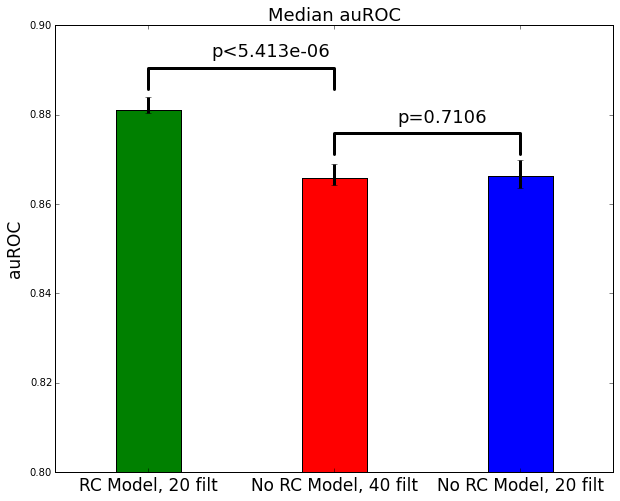

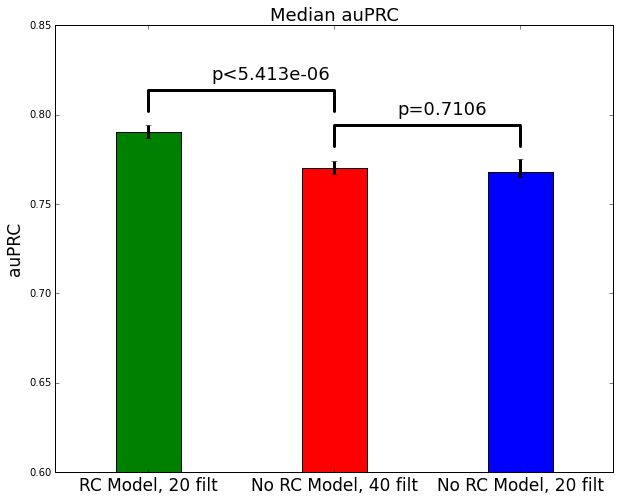

In [20]:
def label_diff(i,j,text,X,Y,yrange):
    x = (X[i]+X[j])/2
    y = 1.0*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])

    y = y - 0.03*yrange
    
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':35,'shrinkB':35,'lw':3}
    ax.annotate(text, xy=(x-0.15,y+yrange*0.15), zorder=10, fontsize=18)
    ax.annotate('', xy=(X[i],y+0.0), xytext=(X[j],y), arrowprops=props)

LABEL_KEY = {
    'RC Model, 20 filters': 'RC Model, 20 filt',
    'No RC Model, 20 filters': 'No RC Model, 20 filt',
    'No RC Model, 40 filters': 'No RC Model, 40 filt'
}
    
    
colors = ['green', 'red', 'blue']
for group_stats, stats_name, ymin, ymax in [(auroc_per_group, 'auROC', 0.8, 0.9), (auprc_per_group, 'auPRC', 0.6, 0.85)]:

    N = 3
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars
    fig, ax = plt.subplots(figsize=(10,8))

    X = ind+width/2
    
    all_rects = []
    
    
    keys = list(group_stats.keys())
    
    for series_idx, (series, color) in enumerate([(keys, colors)]):
#         means = np.array([np.mean(group_stats[x]) for x in series])
        medians = np.array([np.median(group_stats[x]) for x in series])
        upper_error = np.array([np.max(group_stats[x]) for x in series]) - medians
        lower_error = np.abs(np.array([np.min(group_stats[x]) for x in series]) - medians)
        rects = ax.bar(ind + width*series_idx, medians, width, color=color, yerr=[upper_error, lower_error], ecolor='k', error_kw={'elinewidth':3})
        all_rects.append(rects)
        
    # add some text for labels, title and axes ticks
    ax.set_ylabel(stats_name, fontsize=17)
    ax.set_ylim(ymin,ymax)
    ax.set_title('Median %s'%stats_name, fontsize=18)
    ax.set_xticks(ind + width / 2.0)
    ax.set_xticklabels([LABEL_KEY[el] for el in group_stats.keys()], fontsize=17)
    ax.set_xlim(np.min(X)-.5, np.max(X)+.5)
#    ax.legend((all_rects[0][0]), ('without-rc', 'with-rc'), loc=0)

    label_diff(0,1,'p<5.413e-06',X,medians,ymax-ymin)
    label_diff(1,2,'p=0.7106',X,medians,ymax-ymin)
#     plt.show()
    plt.savefig('/mnt/lab_data/kundaje/users/pgreens/projects/RC_convolutions/plots/median_%s_hist_1_23_17.png'%stats_name)
    plt.savefig('/mnt/lab_data/kundaje/users/pgreens/projects/RC_convolutions/plots/median_%s_hist_1_23_17.pdf'%stats_name, format='pdf')



RevComp_20pct_noise_20_filters_seed_1
(21, 1, 4, 20)
(21, 1, 20)
(1, 20)
(20,)
(20,)
(21, 1, 1, 20)
(21, 1, 4, 20)
no_RevComp_20pct_noise_20_filters_seed_1
(21, 1, 4, 20)
(21, 1, 20)
(1, 20)
(20,)
(20,)
(21, 1, 1, 20)
(21, 1, 4, 20)
no_RevComp_20pct_noise_40_filters_seed_1
(21, 1, 4, 40)
(21, 1, 40)
(1, 40)
(40,)
(40,)
(21, 1, 1, 40)
(21, 1, 4, 40)


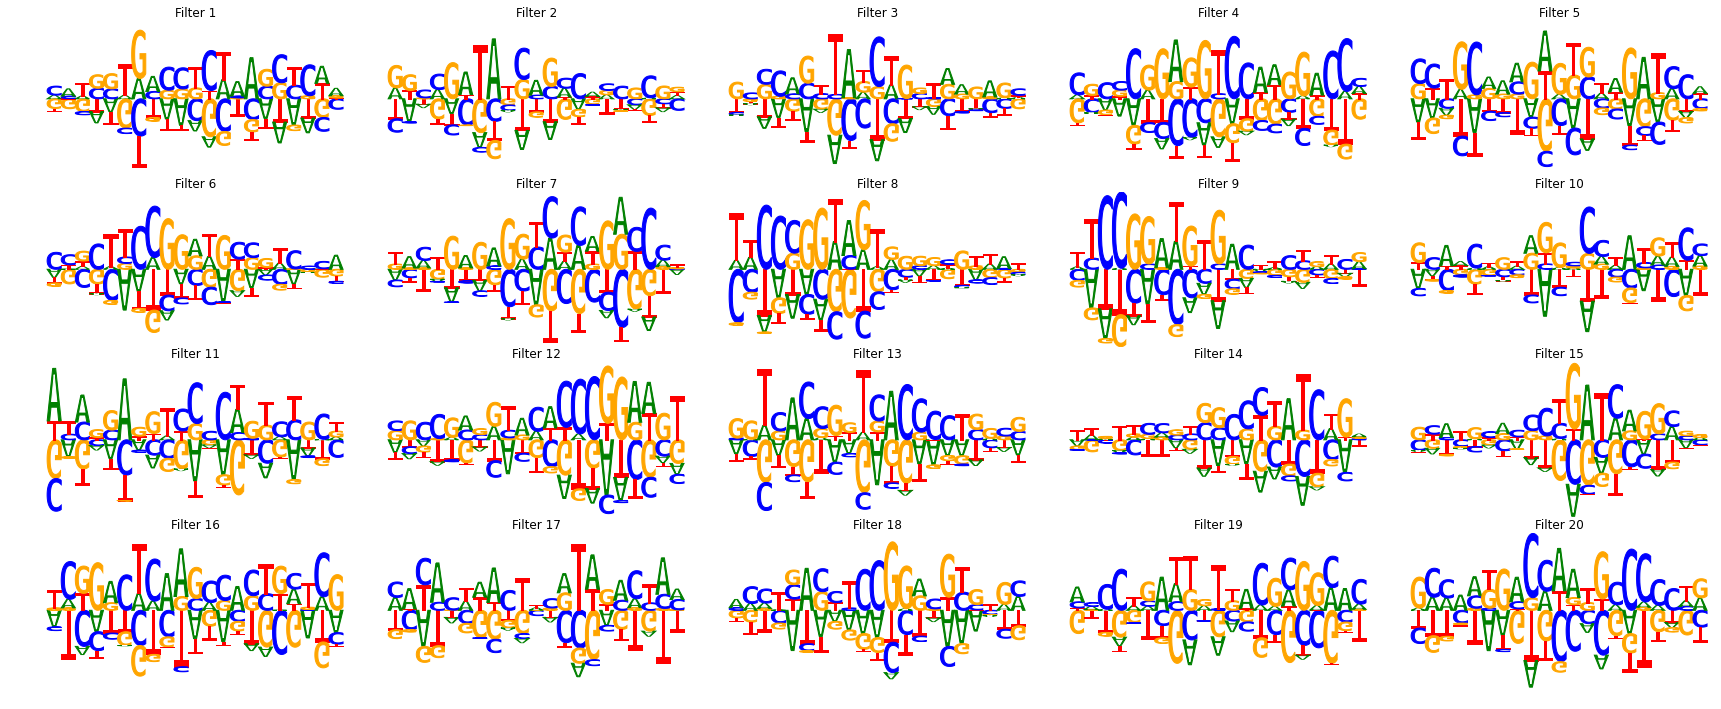

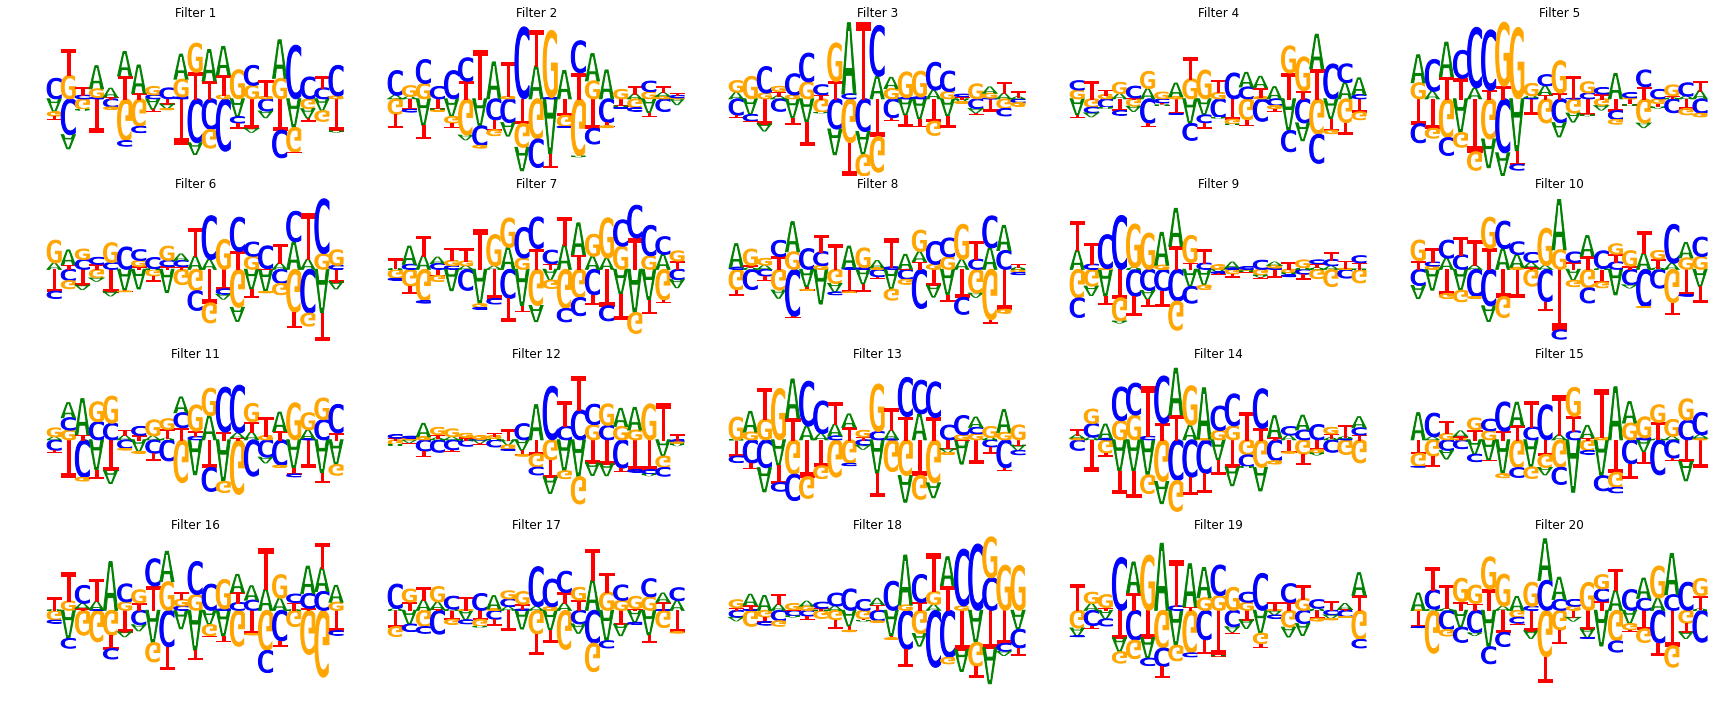

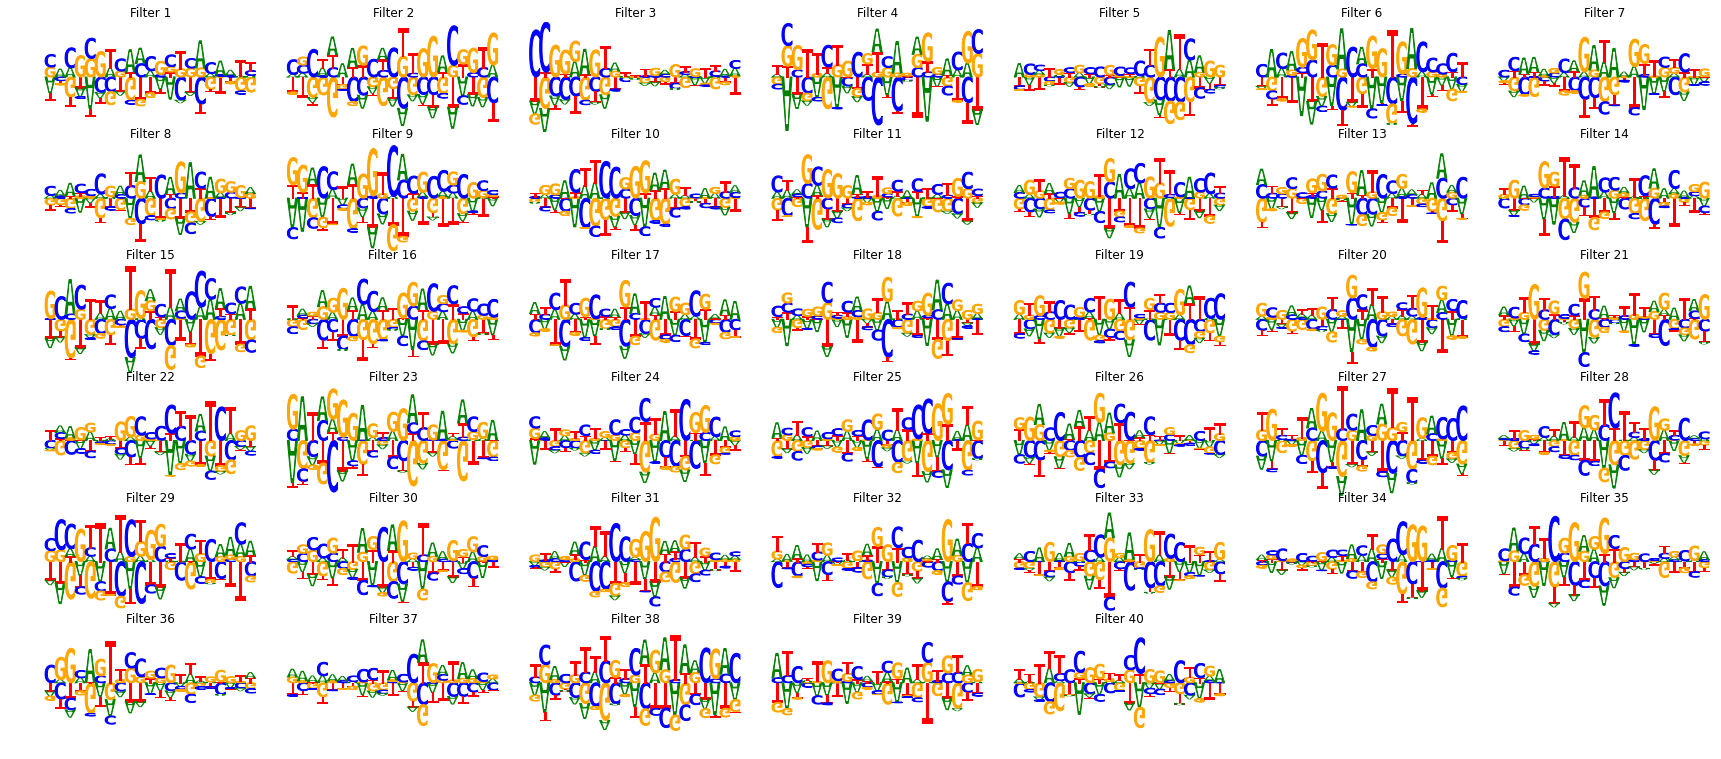

In [45]:
### PLot filters
import dragonn
import dragonn.plot

def plot_filters(conv_filters):
    fig = plt.figure(figsize=(30, 15))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    num_plots_per_axis = int(conv_filters.shape[3]**0.5) + 1
    for i in range(conv_filters.shape[3]):
        conv_filter = np.squeeze(conv_filters[:,:,:,i])
        ax = fig.add_subplot(num_plots_per_axis, num_plots_per_axis, i+1)
        dragonn.plot.add_letters_to_axis(ax, conv_filter)
        ax.axis("off")
        ax.set_title("Filter %s" % (str(i+1)))

def normalize_conv_layer_tf_ordering(weights, bias):
    #weights: outputchannels, inputChannels, windowDims
    assert len(weights.shape)==4;
    assert weights.shape[1]==1;
    assert weights.shape[2]==4;
    print weights.shape
    meanWeightsAtPositions=np.mean(weights,axis=2);
    print meanWeightsAtPositions.shape
    print np.sum(meanWeightsAtPositions,axis=0).shape
    print np.sum(np.sum(meanWeightsAtPositions,axis=0),axis=0).shape
    print bias.shape
    newBias = bias + np.sum(np.sum(meanWeightsAtPositions,axis=0),axis=0);
    meanWeightsAtPositions=meanWeightsAtPositions[:,:,None,:];
    print meanWeightsAtPositions.shape
    print weights.shape
    renormalisedWeights=weights-meanWeightsAtPositions;
    return renormalisedWeights, newBias;

# # plot_filters(RC_weights)
# # plot_filters(no_RC_weights)
# # plot_filters(RC_weights[:,::-1,:,:])
# # plot_filters(no_RC_weights[:,::-1,:,:])
# # plt.show()
# RC_weights_norm, RC_biases_norm = normalize_conv_layer_tf_ordering(RC_weights,RC_biases)
# print RC_weights_norm.shape
# no_RC_weights_norm, no_RC_biases_norm = normalize_conv_layer_tf_ordering(no_RC_weights,no_RC_biases)
# plot_filters(RC_weights_norm[:,:,::-1,:])
# plot_filters(no_RC_weights_norm[:,:,::-1,:])
# plt.show()

for model_load_config in model_load_configs:
    weights = model_load_config['weights']
    json = model_load_config['json']
    descriptor = model_load_config['descriptor']
    print descriptor
    keras_model = kc.load_keras_model(weights=weights,
                                      json=json)
    weights, biases = keras_model.layers[0].get_weights()
    weights_norm, biases_norm = normalize_conv_layer_tf_ordering(weights, biases)
    plot_filters(weights_norm[:,:,::-1,:])
#     plt.show()
    plt.savefig('/mnt/lab_data/kundaje/users/pgreens/projects/RC_convolutions/plots/filters_%s_1_23_17.png'%descriptor)
    plt.savefig('/mnt/lab_data/kundaje/users/pgreens/projects/RC_convolutions/plots/filters_%s_1_23_17.pdf'%descriptor, format='pdf')


In [ ]:
import theano
import keras.backend as K
layer9_out = theano.function([keras_model.input, K.learning_phase()],
                             keras_model.layers[9].output, allow_input_downcast=True)
layer10_out = theano.function([keras_model.input, K.learning_phase()],
                             keras_model.layers[10].output, allow_input_downcast=True)
layerm2_out = theano.function([keras_model.input, K.learning_phase()],
                             keras_model.layers[-2].output, allow_input_downcast=True)

In [12]:
import numpy as np
random_input = np.random.random((1,1000,4))

In [13]:
print(np.max(np.abs(layer9_out(random_input, False) - layer9_out(random_input[:, ::-1, ::-1], False)[:,::-1,::-1])))
print(layer10_out(random_input, False))
print(layer10_out(random_input[:,::-1,::-1], False))
print(layerm2_out(random_input, False))
print(layerm2_out(random_input[:,::-1,::-1], False))

2.6226e-06
[[ -2.51437783e-01   4.19698358e-01   8.48584414e-01  -5.57352304e-01
   -8.74572434e-04  -1.23056024e-03  -9.86010909e-01  -4.20085400e-01
    1.15228549e-01  -2.26033151e-01   8.87029395e-02   1.21177442e-01
   -3.24154906e-02   1.09678936e+00  -8.52027237e-02   4.34186101e-01
    3.25265288e-01  -5.27580976e-02   1.03787553e+00   1.42582193e-01
   -1.58223901e-02   3.08232903e-01  -1.06000900e-01   1.22726616e-02
   -2.55050123e-01  -6.84527159e-01   1.98173150e-01  -1.69384211e-01
   -1.59774750e-01   1.18553293e+00   1.51197106e-01  -2.89092243e-01]]
[[ -2.89092064e-01   1.51196986e-01   1.18553269e+00  -1.59774959e-01
   -1.69384241e-01   1.98173046e-01  -6.84527516e-01  -2.55050033e-01
    1.22724734e-02  -1.06000841e-01   3.08233023e-01  -1.58224478e-02
    1.42582163e-01   1.03787529e+00  -5.27581871e-02   3.25265676e-01
    4.34185922e-01  -8.52028951e-02   1.09678912e+00  -3.24154310e-02
    1.21177338e-01   8.87030512e-02  -2.26033270e-01   1.15228646e-01
   -4.2

In [23]:
import numpy as np
random_inp = np.random.random((10,1000,4))
print(keras_model.predict(random_inp))
print(keras_model.predict(random_inp[:, ::-1, ::-1]))
print(keras_model.predict(random_inp) - keras_model.predict(random_inp[:, ::-1, ::-1]))

[[ 0.07186917]
 [ 0.07434497]
 [ 0.12864782]
 [ 0.18770845]
 [ 0.04313384]
 [ 0.0209079 ]
 [ 0.02083969]
 [ 0.04040418]
 [ 0.03760781]
 [ 0.01761588]]
[[ 0.21423988]
 [ 0.05645425]
 [ 0.18132485]
 [ 0.07592847]
 [ 0.05251423]
 [ 0.05046884]
 [ 0.11245374]
 [ 0.02317481]
 [ 0.06928993]
 [ 0.04388957]]
[[-0.1423707 ]
 [ 0.01789072]
 [-0.05267704]
 [ 0.11177998]
 [-0.00938039]
 [-0.02956094]
 [-0.09161405]
 [ 0.01722937]
 [-0.03168212]
 [-0.0262737 ]]


In [22]:
print(descriptor)

rc-f_nbf-16_ws-f_str-20


In [9]:
#compute grad*input importance scores
import theano
from keras import backend as K
import numpy as np
=

In [11]:
fwd_scores = score_func(random_inp, False)

In [12]:
rev_scores = score_func(random_inp[:,::-1,::-1], False)

In [13]:
fwd_scores

array([[[  2.88720687e-05,   2.10542168e-06,  -3.05712719e-07,
           5.01426661e-06],
        [  6.44317652e-06,  -6.10106716e-06,   3.29393166e-05,
          -5.93701917e-06],
        [ -1.19300901e-05,   6.60085608e-05,  -3.63180555e-05,
          -3.47935793e-05],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          -0.00000000e+00],
        [ -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
          -0.00000000e+00]],

       [[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          -0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [ -9.30333819e-06,  -2.39654940e-05,  -3.66509386e-05,
           8.79684209e-06],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+0

In [14]:
rev_scores

array([[[ -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
          -0.00000000e+00],
        [ -1.49720193e-06,  -1.38762531e-06,   4.74566969e-06,
           1.83765845e-05],
        ..., 
        [ -2.30729281e-05,  -1.64095363e-04,   2.85617817e-04,
           7.44929357e-05],
        [  2.42459380e-05,   4.88165322e-05,  -8.79188661e-06,
          -1.63304653e-04],
        [  2.78936315e-06,   2.37722854e-06,  -2.99817116e-05,
          -1.83410632e-04]],

       [[  0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        ..., 
        [  4.09363629e-05,  -2.10790250e-05,  -8.65714357e-05,
          -5.59211855e-05],
        [  3.92407456e-06,  -5.50303633e-05,   8.22958304e-0